In [28]:
import os
import zipfile
import urllib.request
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from scipy.io import arff

DATA_DIR = 'datasets'
os.makedirs(DATA_DIR, exist_ok=True)

def download_dataset(dataset_name, url):
    zip_path = os.path.join(DATA_DIR, f"{dataset_name}.zip")
    extract_path = os.path.join(DATA_DIR, dataset_name)

    print(f"Downloading {dataset_name}...")
    urllib.request.urlretrieve(url, zip_path)

    print(f"Extracting {dataset_name}...")
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_path)

    os.remove(zip_path)
    print(f"Extracted to {extract_path}")
    return extract_path

def load_arff_data(file_path):
    print(f"Loading {file_path} ...")
    data, meta = arff.loadarff(file_path)
    df = pd.DataFrame(data)
    return df

def preprocess_data(train_df, test_df, valid_size=0.5, random_state=42):
    # 1) Separate features & labels
    X_train_df = train_df.drop(columns=['target'])
    y_train_df = train_df['target'].apply(lambda x: int(x) - 1)  # Adjust labels to start from 0

    X_temp_df  = test_df.drop(columns=['target'])
    y_temp_df  = test_df['target'].apply(lambda x: int(x) - 1)

    # 2) Split test into validation & test sets
    X_valid_df, X_test_df, y_valid_df, y_test_df = train_test_split(
        X_temp_df, y_temp_df,
        test_size=valid_size,
        random_state=random_state,
        stratify=y_temp_df
    )

    # 3) Normalize features (fit only on train)
    scaler = StandardScaler().fit(X_train_df)

    X_train_df = pd.DataFrame(scaler.transform(X_train_df), columns=X_train_df.columns, index=X_train_df.index)
    X_valid_df = pd.DataFrame(scaler.transform(X_valid_df), columns=X_valid_df.columns, index=X_valid_df.index)
    X_test_df  = pd.DataFrame(scaler.transform(X_test_df),  columns=X_test_df.columns,  index=X_test_df.index)

    # 4) Return DataFrames and Series
    return X_train_df, y_train_df, X_valid_df, y_valid_df, X_test_df, y_test_df

if __name__ == "__main__":
    dataset_name = 'MelbournePedestrian'
    dataset_url = 'https://timeseriesclassification.com/aeon-toolkit/MelbournePedestrian.zip'

    extract_path = download_dataset(dataset_name, dataset_url)

    train_file = os.path.join(extract_path, f'{dataset_name}_nmv_TRAIN.arff')
    test_file  = os.path.join(extract_path, f'{dataset_name}_nmv_TEST.arff')

    train_df = load_arff_data(train_file)
    test_df  = load_arff_data(test_file)

    X_train, y_train, X_valid, y_valid, X_test, y_test = preprocess_data(train_df, test_df)

    print("Shapes:")
    print(f"  X_train: {X_train.shape},  y_train: {y_train.shape}")
    print(f"  X_valid: {X_valid.shape},  y_valid: {y_valid.shape}")
    print(f"  X_test : {X_test.shape},   y_test : {y_test.shape}")

    print(f"Number of classes: {len(np.unique(y_train))}")

Extracting MelbournePedestrian...
Extracted to datasets/MelbournePedestrian
Loading datasets/MelbournePedestrian/MelbournePedestrian_nmv_TRAIN.arff ...
Loading datasets/MelbournePedestrian/MelbournePedestrian_nmv_TEST.arff ...
Shapes:
  X_train: (1138, 24),  y_train: (1138,)
  X_valid: (1159, 24),  y_valid: (1159,)
  X_test : (1160, 24),   y_test : (1160,)
Number of classes: 10


In [20]:
import os
import zipfile
import urllib.request
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from scipy.io import arff

DATA_DIR = 'datasets'
os.makedirs(DATA_DIR, exist_ok=True)

def download_dataset(dataset_name, url):
    zip_path    = os.path.join(DATA_DIR, f"{dataset_name}.zip")
    extract_dir = os.path.join(DATA_DIR, dataset_name)
    urllib.request.urlretrieve(url, zip_path)
    with zipfile.ZipFile(zip_path, 'r') as zp:
        zp.extractall(extract_dir)
    os.remove(zip_path)
    return extract_dir

def load_arff_data(file_path):
    raw, meta = arff.loadarff(file_path)
    return pd.DataFrame(raw)

def preprocess_data(train_df, test_df, valid_size=0.5, random_state=42):
    # --- 1) Separate features & labels ---
    X_train_df = train_df.drop(columns=['target'])
    y_train_df = train_df['target'].astype(int)

    X_temp_df  = test_df.drop(columns=['target'])
    y_temp_df  = test_df['target'].astype(int)

    # --- 2) Split temp into validation & test ---
    X_valid_df, X_test_df, y_valid_df, y_test_df = train_test_split(
        X_temp_df, y_temp_df,
        test_size=valid_size,
        random_state=random_state,
        stratify=y_temp_df
    )

    # --- 3) Normalize all features (fit on train only) ---
    scaler = StandardScaler().fit(X_train_df)
    X_train_df = pd.DataFrame(
        scaler.transform(X_train_df),
        columns=X_train_df.columns,
        index=X_train_df.index
    )
    X_valid_df = pd.DataFrame(
        scaler.transform(X_valid_df),
        columns=X_valid_df.columns,
        index=X_valid_df.index
    )
    X_test_df = pd.DataFrame(
        scaler.transform(X_test_df),
        columns=X_test_df.columns,
        index=X_test_df.index
    )

    # --- 4) Return six DataFrames/Series ---
    return X_train_df, y_train_df, X_valid_df, y_valid_df, X_test_df, y_test_df

if __name__ == "__main__":
    dataset_name = 'MelbournePedestrian'
    url = 'https://timeseriesclassification.com/aeon-toolkit/MelbournePedestrian.zip'

    path = download_dataset(dataset_name, url)
    train_df = load_arff_data(os.path.join(path, f"{dataset_name}_TRAIN.arff"))
    test_df  = load_arff_data(os.path.join(path, f"{dataset_name}_TEST.arff"))

    X_train, y_train, X_valid, y_valid, X_test, y_test = preprocess_data(train_df, test_df)

    print("Shapes:")
    print("  X_train:", X_train.shape, " y_train:", y_train.shape)
    print("  X_valid:", X_valid.shape, " y_valid:", y_valid.shape)
    print("  X_test: ", X_test.shape,  " y_test: ", y_test.shape)


Shapes:
  X_train: (1194, 24)  y_train: (1194,)
  X_valid: (1219, 24)  y_valid: (1219,)
  X_test:  (1220, 24)  y_test:  (1220,)


In [13]:
import embd_fgit as embd
import clasfy_p1 as clasfy
import clasfy_p2 as clasfy2
import plot_umap as plt_um
import pandas as pd
import numpy

In [16]:
def std_scaling(train_df, valid_df, test_df):
    """Applies Standard Scaling to the input DataFrames.

    Args:
        train_df (pd.DataFrame): The training DataFrame.
        valid_df (pd.DataFrame): The validation DataFrame.
        test_df (pd.DataFrame): The testing DataFrame.

    Returns:
        tuple: A tuple containing the scaled DataFrames (train_sc, valid_sc, test_sc).
    """
    # Reshape the 3D tensors to 2D for StandardScaler
    train_df_2d = train_df.reshape(train_df.shape[0], -1) # Reshape to (samples, time_steps * features)
    valid_df_2d = valid_df.reshape(valid_df.shape[0], -1)
    test_df_2d = test_df.reshape(test_df.shape[0], -1)

    scaler = StandardScaler()
    # Fit and transform on the training data
    scaled_data = scaler.fit_transform(train_df_2d)

    # Transform the validation and test data
    scaled_valid_data = scaler.transform(valid_df_2d)
    scaled_test_data = scaler.transform(test_df_2d)

    # Reshape back to 3D after scaling
    train_sc = scaled_data.reshape(train_df.shape)
    valid_sc = scaled_valid_data.reshape(valid_df.shape)
    test_sc = scaled_test_data.reshape(test_df.shape)

    return train_sc, valid_sc, test_sc

In [17]:
from sklearn.preprocessing import StandardScaler # Make sure StandardScaler is imported

train_sc, val_sc, test_sc = std_scaling(X_train.numpy(), X_valid.numpy(), X_test.numpy()) # Remove extra indent

In [29]:
#Performing scaling of the datasets
train_sc, val_sc, test_sc = embd.std_scaling(X_train, X_valid, X_test)
#without overlapping windows
train_sct=train_sc
test_sct=test_sc
val_sct=val_sc
ny_train=y_train
ny_test=y_test
ny_val=y_valid
ny_train2=y_train-1
ny_test2=y_test-1
ny_val2=y_valid-1


In [31]:
#pca embedding
train_pca, val_pca, test_pca = embd.pca_embedding(train_sc, val_sc, test_sc,24)

In [32]:
#to save your embeddings
np.savetxt('tr_ep_pca_embeddings.txt', train_pca)
np.savetxt('te_ep_pca_embeddings.txt', test_pca)
np.savetxt('vl_ep_pca_embeddings.txt', val_pca)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/content/plot_umap.py:23: UserWarning: 
The palette list has fewer values (5) than needed (10) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(x=embedding[:, 0], y=embedding[:, 1], hue=ny_test.values.flatten(), palette=cp,s=50,hue_order=hue_order)


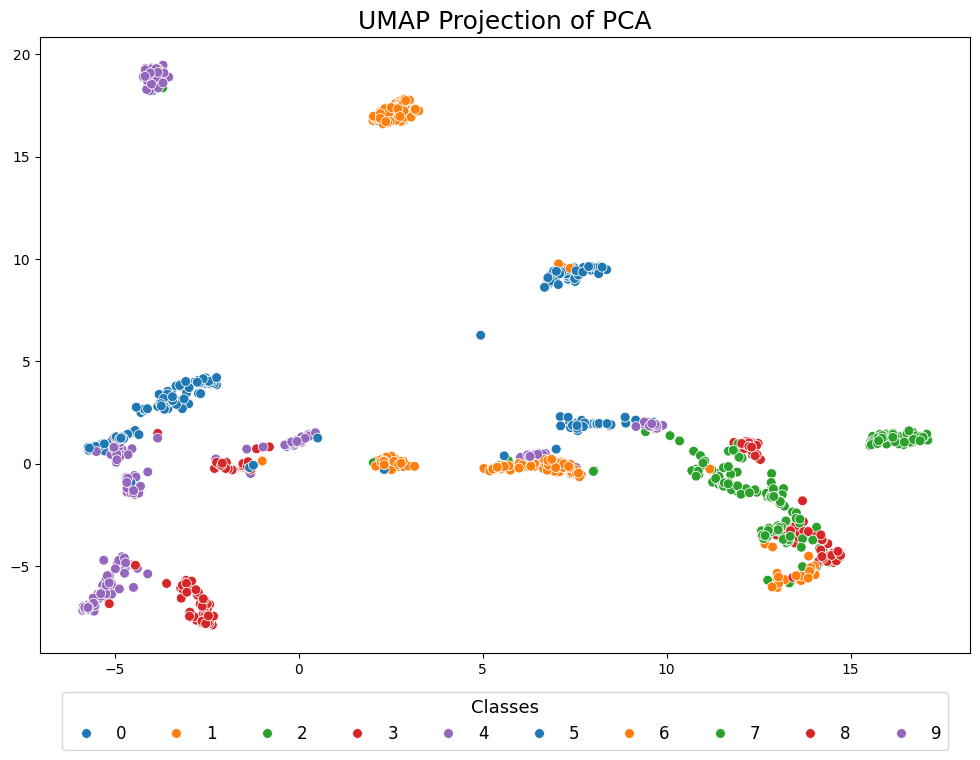

In [33]:
#to plot the umap visualization of the embedding
name='pca'
#to get the umap embedding
plt_um.umap_plt(train_pca, val_pca, test_pca, ny_train, ny_val, ny_test, 'PCA')

In [40]:
#discrete wavelet transform
train_wt, val_wt, test_wt = embd.wavelet_embedding(train_sc, val_sc, test_sc)

In [41]:
np.savetxt('tr_ep_wt_embeddings.txt', train_wt)
np.savetxt('te_ep_wt_embeddings.txt', test_wt)
np.savetxt('vl_ep_wt_embeddings.txt', val_wt)

In [25]:
#to get the umap embedding
plt_um.umap_plt(train_wt, val_wt, test_wt, ny_train, ny_val, ny_test, 'Wavelet Transform')

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


ValueError: Input contains NaN.

In [48]:
#Fast Fourier Transform
train_fft, val_fft, test_fft = embd.fft_embedding(train_sc, val_sc, test_sc)

In [49]:
np.savetxt('tr_ep_fft_embeddings.txt', train_fft)
np.savetxt('te_ep_fft_embeddings.txt', test_fft)
np.savetxt('vl_ep_fft_embeddings.txt', val_fft)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/content/plot_umap.py:23: UserWarning: 
The palette list has fewer values (5) than needed (7) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(x=embedding[:, 0], y=embedding[:, 1], hue=ny_test.values.flatten(), palette=cp,s=50,hue_order=hue_order)


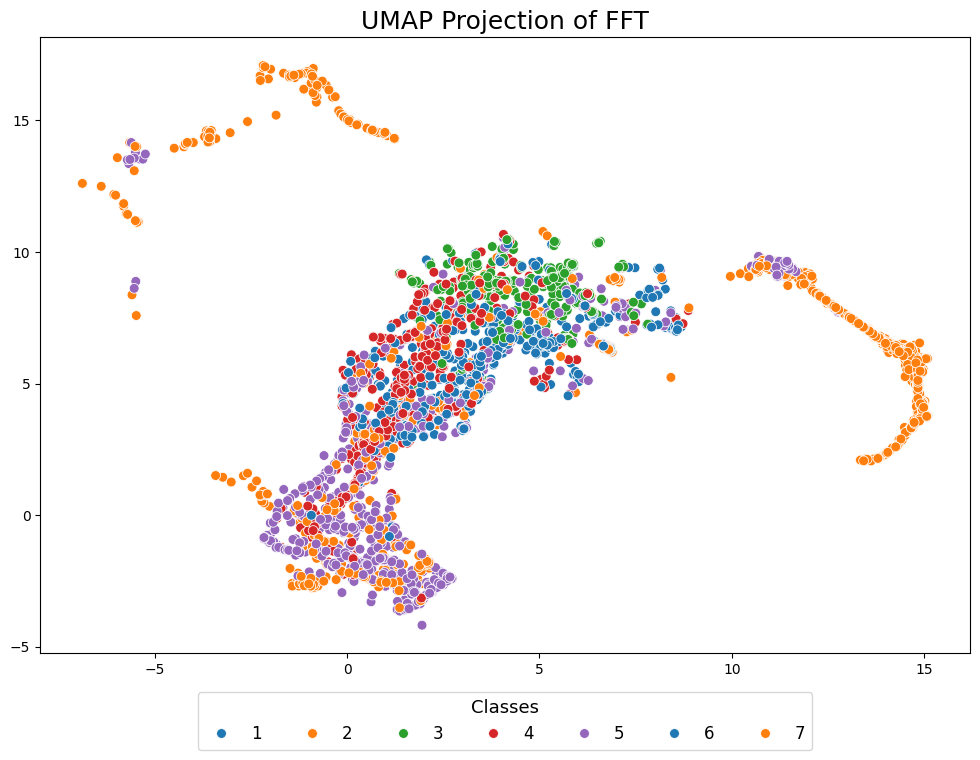

In [ ]:
#to get the umap embedding
plt_um.umap_plt(train_fft, val_fft, test_fft, ny_train, ny_val, ny_test, 'FFT')

In [55]:
#Graph Embedding
#Based on the source paper and the algorithm discussed, this scaling method is used
train_mmc, val_mmc,test_mmc = embd.minmax_scaling(X_train, X_valid,X_test)
train_mml=train_mmc.values.tolist()
val_mml=val_mmc.values.tolist()
test_mml=test_mmc.values.tolist()

train_gr, val_gr, test_gr = embd.graph_embedding(train_mml, val_mml, test_mml)

In [ ]:
np.savetxt('tr_ep_gr_embeddings.txt', train_gr)
np.savetxt('te_ep_gr_embeddings.txt', test_gr)
np.savetxt('vl_ep_gr_embeddings.txt', val_gr)

In [ ]:
#to get the umap embedding
plt_um.umap_plt(train_gr, val_gr, test_gr, ny_train, ny_val, ny_test, 'Graph')

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/content/plot_umap.py:23: UserWarning: 
The palette list has fewer values (5) than needed (7) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(x=embedding[:, 0], y=embedding[:, 1], hue=ny_test.values.flatten(), palette=cp,s=50,hue_order=hue_order)


In [ ]:
#TDA Embedding
train_tda,val_tda,test_tda = embd.tda_embedding(train_mml, val_mml, test_mml)

In [ ]:
np.savetxt('tr_ep_tda_embeddings.txt', train_tda)
np.savetxt('te_ep_tda_embeddings.txt', test_tda)
np.savetxt('vl_ep_tda_embeddings.txt', val_tda)

In [ ]:
#to get the umap embedding
plt_um.umap_plt(train_tda,val_tda, test_tda, ny_train, ny_val, ny_test, 'TDA')

In [ ]:
#LLE Embedding
train_lle, val_lle, test_lle = embd.lle_embedding(train_sc, val_sc, test_sc,{'n_components':64, 'n_neighbors':5,'random_state':12})

In [ ]:
np.savetxt('tr_ep_lle_embeddings.txt', train_lle)
np.savetxt('te_ep_lle_embeddings.txt', test_lle)
np.savetxt('vl_ep_lle_embeddings.txt', val_lle)

In [ ]:
plt_um.umap_plt(train_lle, val_lle, test_lle, ny_train, ny_val, ny_test, 'LLE')

In [ ]:
#UMAP Embedding
train_umap, val_umap, test_umap = embd.umap_embedding(train_sc, val_sc, test_sc)

In [ ]:
np.savetxt('tr_ep_umap_embeddings.txt', train_umap)
np.savetxt('te_ep_umap_embeddings.txt', test_umap)
np.savetxt('vl_ep_umap_embeddings.txt', val_umap)

In [ ]:
plt_um.umap_plt(train_sc, val_sc, test_sc, ny_train, ny_val, ny_test, 'Dataset')

In [ ]:
#AE Embedding
train_ae, val_ae, test_ae = embd.AE_embedding(train_sc, val_sc, test_sc)

In [ ]:
plt_um.umap_plt(train_ae, val_ae, test_ae, ny_train, ny_val, ny_test, 'AE')

In [ ]:
np.savetxt('tr_ep_ae_embeddings.txt', train_ae)
np.savetxt('te_ep_ae_embeddings.txt', test_ae)
np.savetxt('vl_ep_ae_embeddings.txt', val_ae)

In [ ]:
#nnclr_lstm embedding
#for the paper, 100 finetuning and training epochs were chosen, but here the example is done for 20 epochs
import nnclr_embd as nn
train_nn_lstm, val_nn_lstm, test_nn_lstm = nn.nnclr_lstm_embedding(train_sc, val_sc, test_sc,y_train-1,y_valid-1,y_test-1,64,7)

In [42]:
namem="ECG5000_pca"

best_params, best_score = clasfy.optimize_LOGRG(train_wt, val_wt, test_wt,ny_train, ny_val, ny_test,namem)
print(best_params, best_score)


[I 2025-04-24 18:29:09,010] A new study created in memory with name: no-name-dd2dbf06-3387-4f2d-a3b1-6f7661b6369e
[I 2025-04-24 18:29:09,029] Trial 0 finished with value: 0.10440034512510785 and parameters: {'C': 0.0002834336359426676, 'fit_intercept': False, 'solver': 'saga', 'penalty': 'elasticnet', 'l1_ratio': 0.4273034943092626}. Best is trial 0 with value: 0.10440034512510785.
[I 2025-04-24 18:29:09,066] Trial 1 finished with value: 0.30629853321829165 and parameters: {'C': 0.0031437742142494817, 'fit_intercept': False, 'solver': 'saga', 'penalty': 'elasticnet', 'l1_ratio': 0.6017365584307101}. Best is trial 1 with value: 0.30629853321829165.
[I 2025-04-24 18:29:09,083] Trial 2 finished with value: 0.10440034512510785 and parameters: {'C': 1.5162144910800868e-07, 'fit_intercept': False, 'solver': 'saga', 'penalty': 'elasticnet', 'l1_ratio': 0.26122145842126543}. Best is trial 1 with value: 0.30629853321829165.
[I 2025-04-24 18:29:09,099] Trial 3 finished with value: 0.105263157894

0.13413095474243164  seconds
Classification report saved as ECG5000_pca_classification_report_2025-04-24_18-34-26.txt
{'C': 15.953645327142622, 'fit_intercept': True, 'solver': 'saga', 'penalty': 'elasticnet', 'l1_ratio': 0.9965884915593286} 0.868103448275862


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [50]:
best_params, best_score = clasfy.optimize_DT(train_fft, val_fft, test_fft,ny_train, ny_val, ny_test,namem)
print(best_params, best_score)


[I 2025-04-24 18:36:27,527] A new study created in memory with name: no-name-939ea146-95f4-4c34-bdba-7aa3e5b6ec65
[I 2025-04-24 18:36:27,583] Trial 0 finished with value: 0.7592752372735116 and parameters: {'max_depth': 31, 'criterion': 'log_loss'}. Best is trial 0 with value: 0.7592752372735116.
[I 2025-04-24 18:36:27,616] Trial 1 finished with value: 0.7497842968075927 and parameters: {'max_depth': 17, 'criterion': 'gini'}. Best is trial 0 with value: 0.7592752372735116.
[I 2025-04-24 18:36:27,650] Trial 2 finished with value: 0.7480586712683348 and parameters: {'max_depth': 21, 'criterion': 'gini'}. Best is trial 0 with value: 0.7592752372735116.
[I 2025-04-24 18:36:27,683] Trial 3 finished with value: 0.7480586712683348 and parameters: {'max_depth': 14, 'criterion': 'gini'}. Best is trial 0 with value: 0.7592752372735116.
[I 2025-04-24 18:36:27,737] Trial 4 finished with value: 0.7627264883520276 and parameters: {'max_depth': 20, 'criterion': 'entropy'}. Best is trial 4 with value:

0.06899333000183105  seconds
Classification report saved as ECG5000_pca_classification_report_2025-04-24_18-36-32.txt
{'max_depth': 14, 'criterion': 'entropy'} 0.7543103448275862


In [51]:
best_params, best_score = clasfy.optimize_RF(train_fft, val_fft, test_fft,ny_train, ny_val, ny_test,namem)
print(best_params, best_score)

[I 2025-04-24 18:36:39,690] A new study created in memory with name: no-name-f5fc774c-9c30-4537-89c4-6c6cc4b4280e
[I 2025-04-24 18:36:40,498] Trial 0 finished with value: 0.8602243313201036 and parameters: {'n_estimators': 156, 'max_depth': 23}. Best is trial 0 with value: 0.8602243313201036.
[I 2025-04-24 18:36:41,089] Trial 1 finished with value: 0.8515962036238136 and parameters: {'n_estimators': 115, 'max_depth': 21}. Best is trial 0 with value: 0.8602243313201036.
[I 2025-04-24 18:36:41,569] Trial 2 finished with value: 0.8636755823986195 and parameters: {'n_estimators': 94, 'max_depth': 32}. Best is trial 2 with value: 0.8636755823986195.
[I 2025-04-24 18:36:42,164] Trial 3 finished with value: 0.8584987057808455 and parameters: {'n_estimators': 112, 'max_depth': 30}. Best is trial 2 with value: 0.8636755823986195.
[I 2025-04-24 18:36:43,133] Trial 4 finished with value: 0.8567730802415876 and parameters: {'n_estimators': 195, 'max_depth': 10}. Best is trial 2 with value: 0.86367

0.8062596321105957  seconds
Classification report saved as ECG5000_pca_classification_report_2025-04-24_18-37-55.txt
{'n_estimators': 159, 'max_depth': 15} 0.8568965517241379


In [52]:
best_params, best_score = clasfy.optimize_KNN(train_fft, val_fft, test_fft,ny_train, ny_val, ny_test,namem)
print(best_params, best_score)


[I 2025-04-24 18:37:55,937] A new study created in memory with name: no-name-344a747a-44f7-4a36-a2f7-ea3cc49fa792
[I 2025-04-24 18:37:55,949] Trial 0 finished with value: 0.8421052631578947 and parameters: {'n_neighbors': 19, 'weights': 'distance', 'algorithm': 'auto'}. Best is trial 0 with value: 0.8421052631578947.
[I 2025-04-24 18:37:55,957] Trial 1 finished with value: 0.8688524590163934 and parameters: {'n_neighbors': 5, 'weights': 'distance', 'algorithm': 'auto'}. Best is trial 1 with value: 0.8688524590163934.
[I 2025-04-24 18:37:55,982] Trial 2 finished with value: 0.8464193270060397 and parameters: {'n_neighbors': 15, 'weights': 'distance', 'algorithm': 'kd_tree'}. Best is trial 1 with value: 0.8688524590163934.
[I 2025-04-24 18:37:56,017] Trial 3 finished with value: 0.8429680759275238 and parameters: {'n_neighbors': 17, 'weights': 'distance', 'algorithm': 'ball_tree'}. Best is trial 1 with value: 0.8688524590163934.
[I 2025-04-24 18:37:56,025] Trial 4 finished with value: 0.

0.02466869354248047  seconds
Classification report saved as ECG5000_pca_classification_report_2025-04-24_18-38-00.txt
{'n_neighbors': 1, 'weights': 'distance', 'algorithm': 'ball_tree'} 0.8594827586206897


In [53]:

best_params, best_score = clasfy.optimize_SVM(train_fft, val_fft, test_fft,ny_train, ny_val, ny_test,namem)
print(best_params, best_score)


[I 2025-04-24 18:38:00,876] A new study created in memory with name: no-name-3a048798-b673-4916-88f4-4547b446185e
[I 2025-04-24 18:38:00,934] Trial 0 finished with value: 0.7955133735979293 and parameters: {'C': 0.3, 'kernel': 'linear', 'degree': 4, 'gamma': 'auto'}. Best is trial 0 with value: 0.7955133735979293.
[I 2025-04-24 18:38:01,043] Trial 1 finished with value: 0.7333908541846419 and parameters: {'C': 1, 'kernel': 'rbf', 'degree': 4, 'gamma': 'scale'}. Best is trial 0 with value: 0.7955133735979293.
[I 2025-04-24 18:38:01,172] Trial 2 finished with value: 0.633304572907679 and parameters: {'C': 0.3, 'kernel': 'rbf', 'degree': 5, 'gamma': 'scale'}. Best is trial 0 with value: 0.7955133735979293.
[I 2025-04-24 18:38:01,289] Trial 3 finished with value: 0.7169974115616912 and parameters: {'C': 0.6, 'kernel': 'rbf', 'degree': 5, 'gamma': 'scale'}. Best is trial 0 with value: 0.7955133735979293.
[I 2025-04-24 18:38:01,406] Trial 4 finished with value: 0.7169974115616912 and paramet

0.1107032299041748  seconds
Classification report saved as ECG5000_pca_classification_report_2025-04-24_18-38-12.txt
{'C': 1, 'kernel': 'rbf', 'degree': 5, 'gamma': 'auto'} 0.8577586206896551


In [54]:
best_params, best_score = clasfy2.optimize_NB(train_fft, val_fft, test_fft,ny_train, ny_val, ny_test,namem)
print(best_params, best_score)


[I 2025-04-24 18:38:12,647] A new study created in memory with name: no-name-5231a245-5429-4d2f-9619-088f7968c18e
[I 2025-04-24 18:38:12,654] Trial 0 finished with value: 0.4823123382226057 and parameters: {'var_smoothing': 5.870157014230063e-11}. Best is trial 0 with value: 0.4823123382226057.
[I 2025-04-24 18:38:12,659] Trial 1 finished with value: 0.4823123382226057 and parameters: {'var_smoothing': 7.489004051105162e-12}. Best is trial 0 with value: 0.4823123382226057.
[I 2025-04-24 18:38:12,664] Trial 2 finished with value: 0.4823123382226057 and parameters: {'var_smoothing': 3.4856783336221416e-08}. Best is trial 0 with value: 0.4823123382226057.
[I 2025-04-24 18:38:12,670] Trial 3 finished with value: 0.4823123382226057 and parameters: {'var_smoothing': 8.70919404042533e-08}. Best is trial 0 with value: 0.4823123382226057.
[I 2025-04-24 18:38:12,676] Trial 4 finished with value: 0.4823123382226057 and parameters: {'var_smoothing': 1.7781030390334742e-07}. Best is trial 0 with va

Best hyperparameters:  {'var_smoothing': 5.870157014230063e-11}
Best validation accuracy:  0.4823123382226057
Test accuracy: 0.5163793103448275
Time taken: 0.0045697689056396484 seconds
Classification report saved as ECG5000_pca_classification_report_2025-04-24_18-38-13.txt
{'var_smoothing': 5.870157014230063e-11} 0.5163793103448275
